In [36]:
import tensorflow as tf
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import hyperparameters as hp

In [37]:
train = "data/output/train"
validation = "data/output/val"
test = "data/output/test"

In [38]:
# Performs data augmentation (zooms, brightness, shifts, flips)
augmented_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.7, 1.1],
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = augmented_datagen.flow_from_directory(
    directory=train,
    target_size=(hp.img_height, hp.img_width),
    color_mode="rgb",
    batch_size=hp.batch_size,
    class_mode="binary",
    shuffle=True,
    seed=42
)

Found 799 images belonging to 2 classes.


In [39]:
datagen = ImageDataGenerator(rescale=1./255)

validation_generator = datagen.flow_from_directory(
    directory=validation,
    target_size=(hp.img_height, hp.img_width),
    color_mode="rgb",
    batch_size=hp.batch_size,
    class_mode="binary",
    shuffle=True,
    seed=42
)

Found 99 images belonging to 2 classes.


In [40]:
model = tf.keras.models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3),  activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [41]:
results= model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=hp.epochs
)

Train for 25 steps, validate for 4 steps
Epoch 1/15


2022-06-01 02:54:28.048295: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 24 of 25
2022-06-01 02:54:28.449078: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


25/25 [==============================] - 83s 3s/step - loss: 0.4850 - accuracy: 0.7672 - val_loss: 0.4026 - val_accuracy: 0.7879

2022-06-01 02:55:49.042348: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 24 of 25
2022-06-01 02:55:49.458318: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


25/25 [==============================] - 76s 3s/step - loss: 0.2898 - accuracy: 0.8874 - val_loss: 0.1212 - val_accuracy: 0.9394

2022-06-01 02:58:19.646666: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 23 of 25
2022-06-01 02:58:20.737588: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


25/25 [==============================] - 74s 3s/step - loss: 0.2285 - accuracy: 0.9186 - val_loss: 0.0873 - val_accuracy: 0.9596

2022-06-01 02:59:33.514577: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 20 of 25
2022-06-01 02:59:35.819507: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


25/25 [==============================] - 75s 3s/step - loss: 0.2469 - accuracy: 0.9061 - val_loss: 0.0719 - val_accuracy: 0.9697

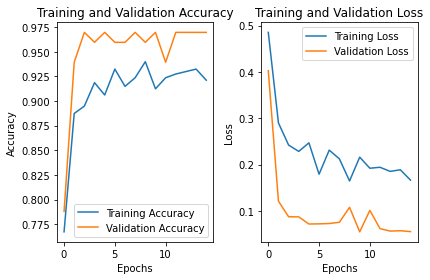

In [42]:
acc = results.history['accuracy']
val_acc = results.history['val_accuracy']

loss = results.history['loss']
val_loss = results.history['val_loss']

epochs_range = range(hp.epochs)

fig, ax = plt.subplots(1, 2)
ax[0].plot(epochs_range, acc, label='Training Accuracy')
ax[0].plot(epochs_range, val_acc, label='Validation Accuracy')
ax[0].legend(loc='lower right')
ax[0].set(title="Training and Validation Accuracy", xlabel="Epochs", ylabel="Accuracy")

ax[1].plot(epochs_range, loss, label='Training Loss')
ax[1].plot(epochs_range, val_loss, label='Validation Loss')
ax[1].legend(loc='upper right')
ax[1].set(title="Training and Validation Loss", xlabel="Epochs", ylabel="Loss")

fig.tight_layout()
plt.show()